<a href="https://colab.research.google.com/github/clee1997/parse_pdf_doc/blob/main/parse_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##############################################################################
### Install packages. Make sure to restart runtime afterwards. 
##############################################################################

import os

!pip install -U pillow

%pip install opencv-python
%pip install matplotlib
!apt-get install poppler-utils 
%pip install pdfminer.six
%pip install pdf2image
%pip install numpy
%pip install JPype1

!apt install tesseract-ocr
!apt install libtesseract-dev
%pip install pytesseract
!apt install ghostscript


%pip install ghostscript # !apt didn't work. you have to pip it. 
%pip install tk
%pip install camelot-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 5.0 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.14 [154 kB]
Fetched 154 kB in 1s (279 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.14_amd64.deb ...
Un

In [ ]:
%pip install -U ocrmypdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 7.0 MB/s 
     |████████████████████████████████| 2.8 MB 13.1 MB/s 
     |████████████████████████████████| 2.6 MB 44.8 MB/s 
     |████████████████████████████████| 97 kB 7.1 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 86 kB 2.6 MB/s 
  Created wheel for img2pdf: filename=img2pdf-0.4.4-py3-none-any.whl size=44881 sha256=37fb623de712104a3bbe03b17eac322201dfa415ccd9fa8410535075895ca9f0
  Stored in directory: /root/.cache/pip/wheels/d2/a7/53/9983aef9861f91881984e08f376e3119bdfeeecf55bd36e585
Successfully built img2pdf
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour 

In [ ]:
##############################################################################
### Mount Google Drive
##############################################################################
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##############################################################################
### Set path to project directories. "path" is path for input PDF file.
##############################################################################
import os

project_path = '/content/drive/My Drive/DMIS/IUPAC_ocr_corr/'
results_path = '/content/drive/My Drive/DMIS/IUPAC_ocr_corr/results/'
files_path = project_path + 'patent_pdf_examples/'#US_table_examples/'


input_file_name = 'main_text_test'
# input_file_name = 'test_example_3' 
# input_file_name = 'test_example_2'

# input_file_name = '78-83_horizontal_tables'
path = os.path.join(files_path, f'{input_file_name}.pdf')

print(f'path = {path}')

path = /content/drive/My Drive/DMIS/IUPAC_ocr_corr/patent_pdf_examples/main_text_test.pdf


In [ ]:
##############################################################################
### Process PDF file at "path" by OCR
##############################################################################
from pdf2image import convert_from_path

print(path)
import ocrmypdf 
dir(ocrmypdf)
   
if __name__ == '__main__':
  try:
    ocrmypdf.ocr(path, path, deskew=True)
  except ocrmypdf.PriorOcrFoundError:
    pdf2images = convert_from_path(path)
    pdf2images[0].save(path, save_all=True, append_images=pdf2images[1:])
    ocrmypdf.ocr(path, path, deskew=True)

/content/drive/My Drive/DMIS/IUPAC_ocr_corr/patent_pdf_examples/main_text_test.pdf


Scanning contents: 100%|██████████| 10/10 [00:00<00:00, 309.49page/s]
OCR: 100%|██████████| 10.0/10.0 [00:46<00:00,  4.62s/page]
PDF/A conversion: 100%|██████████| 10/10 [00:01<00:00,  5.43page/s]
Recompressing JPEGs: 0image [00:00, ?image/s]
Deflating JPEGs: 0image [00:00, ?image/s]
JBIG2: 0item [00:00, ?item/s]


In [ ]:
##############################################################################
### Construct Bounding Box Arrays
##############################################################################

from pdfminer.layout import LAParams, LTTextBox
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator

import re
import regex

## def construct_bbox_arrays(path, char_margin, line_margin, boxes_flow):
# path: path for OCR'd pdf document. result of ocrmypdf. 

## define function with laparam vals as args and call that function 4 times with different args. 



# char_margin = # default = 2.0
# line_margine = # default = 0.1

def construct_bbox_arrays(path, char_margin, line_margin, boxes_flow):

    fp = open(path, 'rb')
    rsrcmgr = PDFResourceManager()
    laparams = LAParams(char_margin=char_margin, line_margin=line_margin, boxes_flow=boxes_flow)
    device = PDFPageAggregator(rsrcmgr, laparams=laparams)
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    pages = PDFPage.get_pages(fp)

    bbox_array = []
    num_pages = 0
    for page_num, page in enumerate(pages):
        num_pages +=1
        print('Processing next page...')
        interpreter.process_page(page)
        page_layout = device.get_result()

        page_sized_box = tuple([round(i) for i in page_layout.bbox])
        page_height = abs(page_sized_box[3]-page_sized_box[1])

        bbox_array.append([]) # add at page dimension

        for textbox in page_layout: # each textbox in a page    
        
            if isinstance(textbox, LTTextBox):
              x1_curr, y1_temp, x2_curr, y2_temp, text = textbox.bbox[0], textbox.bbox[1], textbox.bbox[2], textbox.bbox[3], textbox.get_text()

              # correct for the fact that pdfminer flips y-axis (zero is on the bottom not top)
              y1_curr = page_sized_box[3] - y2_temp
              y2_curr = page_sized_box[3] - y1_temp


              temp = [x1_curr, y1_curr, x2_curr, y2_curr, text]
              bbox_array[page_num].append(temp)
        
        # add sorting after processing each page
        # first sort by y1 -> then sort by x1
        # hopefully in effect this is "sorting each column by y1"
        # bbox_array[page_num].sort(key=lambda x : x[1], reverse = True) # because pdfminer flips y axis?
        # bbox_array[page_num].sort(key=lambda x : x[0])

        # 잠만. 이건 맞냐? x[1]이 y1이니까 이게... 와 헷갈. 
        # bbox_array[page_num] = sorted(bbox_array[page_num], key=lambda x : x[1], reverse = True)




        bbox_array[page_num] = sorted(bbox_array[page_num], key=lambda x : x[1]) # 맞나...?
        # bbox_array[page_num] = sorted(bbox_array[page_num], key=lambda x : x[0])
        # # 아 같은컬럼인데도 x값이 오묘하게 다른???? 경우가 문제인건가?
              
    return bbox_array, num_pages, page_height, page_sized_box


bboxes_default, num_pages, page_height, page_sized_box = construct_bbox_arrays(path, char_margin=2.0, line_margin=0.1, boxes_flow=0.5)
bboxes_clean, _, _, _ = construct_bbox_arrays(path, char_margin=2.0, line_margin=1.1, boxes_flow=0.5) # ori: 1.5
# bboxes_merged_vert, _, _, _ = construct_bbox_arrays(path, char_margin=2.0, line_margin=1000, boxes_flow=0.5)
# bboxes_merged_hor, _, _, _ = construct_bbox_arrays(path, char_margin=1000, line_margin=0.1, boxes_flow=0.5)



Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...
Processing next page...


In [ ]:
##############################################################################
### Set page size parameters
##############################################################################

# page_sized_box = page_sized_box
page_height = page_sized_box[3]-page_sized_box[1]
page_width = page_sized_box[2]-page_sized_box[0]

length = 200
proportion_height = length/page_height
print(f'proportion_height for (length: 200) = {proportion_height}')

proportion_height for (length: 200) = 0.23781212841854935


In [ ]:
bboxes_default

[[[713.0, 147.0, 965.01376, 179.0, 'US 10,188,653 B2\n'],
  [500.0, 190.0, 529.9999399999999, 221.0, '63\n'],
  [1149.0, 190.0, 1180.0, 221.0, '64\n'],
  [255.0,
   229.0,
   776.0048,
   252.0,
   'Step 1. 2-Chloro-N-ethylpyrimidine-5-carboxamide\n'],
  [865.0,
   231.0,
   1462.99954,
   253.0,
   'was diluted with ether (30 mL), and was washed sequen-\n'],
  [865.0,
   262.0,
   1459.00014,
   285.0,
   'tially with aqueous 1N NaOHsolution (1 mL) and brine (1\n'],
  [215.0,
   285.0,
   813.99982,
   308.0,
   'A solution of ethylamine (4.26 g, 0.0946 mol) andtriethyl-\n'],
  [865.0,
   293.0,
   1463.00025,
   316.0,
   'mL). The organic phase was dried over MgSO,,filtered, and\n'],
  [216.0,
   319.0,
   812.9996,
   341.0,
   'amine (28.7 g, 0.284 mol) in dichloromethane (75 mL),\n'],
  [865.0,
   325.0,
   1462.99936,
   348.0,
   'concentrated to provide a cruderesidue, which was purified\n'],
  [215.0,
   350.0,
   814.00008,
   374.0,
   'pre-cooled to -15 to -10° C., was add

In [ ]:
######################################################################################################
### (Work in progress) probs won't even run 
### select id and iupac identifier from main text
######################################################################################################

import re
import pandas as pd

def remove_newline_char(in_string):
  # return re.sub(r'(\n)+', ' ', in_string)
  res = re.sub(r'(\s)*', '', in_string)
  res = re.sub(r'(\s)*(\n)+(\s)*', '', res)
  return res

## Do NOT delete this comment section.
# bboxes_default, num_pages, page_height, page_sized_box = 
# bboxes_clean, _, _, _ = 
# bboxes_merged_vert, _, _, _ = 
# bboxes_merged_hor, _, _, _ = 

bboxes = bboxes_clean # list of list of list (page -> coords)

kw_pattern = r'Example(?P<label>\d+)' # label number goes into group

# iupac_pattern = r'[^Example\d+]-?(?:[^-\s]+-){2,}[^-\s]+-?'
iupac_pattern = r'[^Example\d+]-?(?:[^-\s]+-){2,}[^-\s]+-?'



reg_kw = re.compile(kw_pattern)#, re.IGNORECASE)
reg_iupac = re.compile(iupac_pattern)

num_pages = num_pages
print(f'num_pages = {num_pages}')
dfs = []
for page_idx in range(num_pages):

  df_dic_page = {'iupac_name': [], 'label': []}

  for bbox_idx, bbox in enumerate(bboxes[page_idx]):
    bbox_text = bbox[4] # this has to be string not list
    # print(f'repr(bbox_text) = {repr(bbox_text)}')
    bbox_text = remove_newline_char(bbox_text)
    # print(f'repr(bbox_text) after removing newline = {repr(bbox_text)}')

    bbox_coords = bbox[:4] # should be list

    # check whether this bbox's text content has any regex match
    regex_res_kw = reg_kw.findall(bbox_text)
    regex_res_kw_iter = reg_kw.finditer(bbox_text)
    regex_match_kw = bool(len(regex_res_kw)!=0)

    regex_res_iupac = reg_iupac.findall(bbox_text)
    regex_match_iupac = bool(len(regex_res_iupac)!=0)

    bbox_height = bbox_coords[3]-bbox_coords[1]
    right_height = bool(bbox_height < 0.03*page_height) # adjust this value

    # print(f'regex_match_kw = {regex_match_kw}, regex_match_iupac = {regex_match_iupac}')
    # print(f'regex_res_kw = {regex_res_kw}, regex_res_iupac = {regex_res_iupac}')

    ## things im not considering
    # what if there was >1 matches? wtf is happening then?

    iupac_name = ''
    label = ''

    if regex_match_kw and regex_match_iupac:# and right_height:
      iupac_name = regex_res_iupac[0]

      kw_match_num = 0
      for res in regex_res_kw_iter:
        kw_match_num +=1
        label = res.groupdict(label) # 왜 여기서 val이 아니라 dictionary 전체가 들어가지?
        print(f'why {type(label)}')
        label = label['label']
        print(f'why {type(label)}')

      df_dic_page['iupac_name'].append(iupac_name) # 이 dic은 한 페이지도 아니고 한 문서?에 하나 나와도 되는 것 같은데 일단 페이지 단위로 할까?
      df_dic_page['label'].append(label)

  print(f'printing df_dic_page...\n{df_dic_page}')
  df_page = pd.DataFrame.from_dict(df_dic_page)
  dfs.append(df_page)

print(f'type(dfs[0]) = {type(dfs[0])}')
df_main_text = pd.concat(dfs)
print(df_main_text.head(20))
display(df_main_text)

save_tables = True

if save_tables == True:
  csv_path = results_path + f'{input_file_name}_table_from_main_text.csv'
  print(csv_path)
  df_main_text.to_csv(csv_path)

num_pages = 10
why <class 'dict'>
why <class 'str'>
printing df_dic_page...
{'iupac_name': ['(S)-1-(3-Cyano-6-methyI-4-(trifluoromethyl)pyridin-2-yl)-N-methyl-N-phenylpyrrolidine-.+2-carboxamideOY4.aO—_NSa~NlSNOo'], 'label': ['1']}
why <class 'dict'>
why <class 'str'>
printing df_dic_page...
{'iupac_name': ['(S)-1-(3-Cyano-6-methyI-4-(trifluoromethyl)pyridin-2-yl)-N-isopropyl-N-(m-tolyl)pyrrolidine-2-carboxamide'], 'label': ['2']}
why <class 'dict'>
why <class 'str'>
printing df_dic_page...
{'iupac_name': ['(2S,4S)-1-(3-Cyano-6-methyl-4-(trifluoromethyl)pyridin-2-yl)-4-hydroxy-N-methyl-N-(m-tolyl)pyrrolidine-2-carboxamide'], 'label': ['3']}
why <class 'dict'>
why <class 'str'>
printing df_dic_page...
{'iupac_name': ['(2S,4S)-1-(3-Cyano-4,6-dimethylpyridin-2-yl)-N-(3,4-difluorophenyl)-4-hydroxy-N-methylpyrrolidine-2-carboxamide'], 'label': ['4']}
printing df_dic_page...
{'iupac_name': [], 'label': []}
why <class 'dict'>
why <class 'str'>
printing df_dic_page...
{'iupac_name': ['(2S,4S)-

,iupac_name,label
0,(S)-1-(3-Cyano-6-methyI-4-(trifluoromethyl)pyr...,1
0,(S)-1-(3-Cyano-6-methyI-4-(trifluoromethyl)pyr...,2
0,"(2S,4S)-1-(3-Cyano-6-methyl-4-(trifluoromethyl...",3
0,"(2S,4S)-1-(3-Cyano-4,6-dimethylpyridin-2-yl)-N...",4
0,"(2S,4S)-N-(3-Chloro-4-fluorophenyl)-1-(3-cyano...",5
0,"(2S,4S)-1-(3-Cyano-6-methyl-4-(trifluoromethyl...",6
1,"Stepa.AmixtureofIntermediate4(0.5g,1.56mmol,1e...",5


/content/drive/My Drive/DMIS/IUPAC_ocr_corr/results/main_text_test_table_from_main_text.csv


In [ ]:
######################################################################################################
### Util function to be used for horizontal line detection (get_horizontal_lines() in next cell)
######################################################################################################

def merge_hor_lines(hor_lines, gap_threshold = 100):
    # gap_threshold = 100 # ori 기준

    last_y1 = -111111
    last_x1, last_x2 = -111111, -111111
    hor = []
    for x1,y1,x2,y2 in hor_lines: #
      similar_y_val = bool(abs(y1-last_y1)<50)
      overlaps_horizontally = ( x2 >= last_x1 and  last_x1 >= x1 ) or ( x2 >= last_x2 and last_x2 >= x1 )
      very_close_horizontally = (not overlaps_horizontally) and ( abs(x1-last_x2)<gap_threshold )

      if similar_y_val and (overlaps_horizontally or very_close_horizontally):
        x1,y1,x2,y2 = min(x1, last_x1), last_y1, max(x2, last_x2), last_y1
        last_y1 = y1
        last_x1, last_x2 = x1, x2
        if last_y1 != -111111:
          hor.pop(-1)
        hor.append([x1,y1,x2,y2])
      else: 
        last_y1 = y1
        last_x1, last_x2 = x1, x2
        hor.append([x1,y1,x2,y2])

    return hor

In [ ]:
def get_scaling_factors(page_sized_box, image_shape):
  
  width_pdf = page_sized_box[3] # 페이지의 가로 길이. 아마 원래 이미지보다 작겠지. 
  height_pdf = page_sized_box[2]
  width_ori = image_shape[0]
  height_ori = image_shape[1]

  original_shape = (width_ori, height_ori)
  pdf_shape = (width_pdf, height_pdf)

  if width_ori > width_pdf: 
    print('NEEDS SCALING')
    scale_factor_width = width_pdf / width_ori # could be 1 if we've done resizing. 
    scale_factor_height = height_pdf / height_ori
  else:
    scale_factor_width, scale_factor_height = 1, 1

  return (scale_factor_width, scale_factor_height)

In [ ]:
##############################################################################
### Horizontal Line Detection Function
##############################################################################

def get_horizontal_lines(image, scale_factor_width, scale_factor_height, save_img=False):

    stringent = True
  
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if stringent == True:
      max_line_gap = 5
      img = cv2.threshold(gray,60,255, cv2.THRESH_BINARY) # reducing threshold to 50 was the key!!
    else:
      max_line_gap = 50
      img = cv2.threshold(gray,200,255, cv2.THRESH_BINARY) # reducing threshold to 50 was the key!!

    # bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 1)
    # bw = cv2.bitwise_not(bw)
    
    bw = cv2.bitwise_not(img[1])

    # # show that weird color scheme
    # plt.figure()
    # fig = plt.gcf()
    # fig.set_size_inches(18.5, 10.5)
    # plt.imshow(bw)

    
    horizontal = bw.copy()
   
    img = image.copy()

    # h, w = img.shape[:2]

    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 1))

    # Apply morphology operations
    horizontal = cv2.erode(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)

    horizontal = cv2.dilate(horizontal, (1,1), iterations=5)
    horizontal = cv2.erode(horizontal, (1,1), iterations=5)

    # HoughlinesP function to detect horizontal lines
    hor_lines = cv2.HoughLinesP(horizontal,rho=1,theta=np.pi/180,threshold=100, minLineLength=300,maxLineGap=max_line_gap) # maxLineGap is important

    if hor_lines is None:
        return []


    temp_line = []
    scaled_line = []
    for line in hor_lines:
        print(line)
        for x1,y1,x2,y2 in line:
            temp_line.append([x1,y1-5,x2,y2-5]) # what's this for
            scaled_line.append([ round(x1*scale_factor_width), round((y1-5)*scale_factor_height), round(x2*scale_factor_width), round((y2-5)*scale_factor_height) ])

    # Sorting the list of detected lines by Y1
    hor_lines = sorted(temp_line,key=lambda x: x[0])
    hor_lines = sorted(temp_line,key=lambda x: x[1])
    hor_lines_scaled = sorted(scaled_line,key=lambda x: x[0])
    hor_lines_scaled = sorted(scaled_line,key=lambda x: x[1])

    hor = merge_hor_lines(hor_lines)
    hor_scaled = merge_hor_lines(hor_lines_scaled, round(100*scale_factor_width))
    
    for x1, y1, x2, y2 in hor:
        print('final line added')
        cv2.line(img, (x1,y1), (x2,y2), (0, 255, 0), 20)
    
    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.imshow(img)
    # cv2.waitKey(0)

    # this has to be changed. we call this function several times (for diff images) for one "input_file_name"
    if save_img == True:
      plt.savefig(results_path + f'{input_file_name}_line_detection.png')

    return hor_scaled # hor # yeah turns out we don't need the line selection process. 

cv2_images = [array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [2

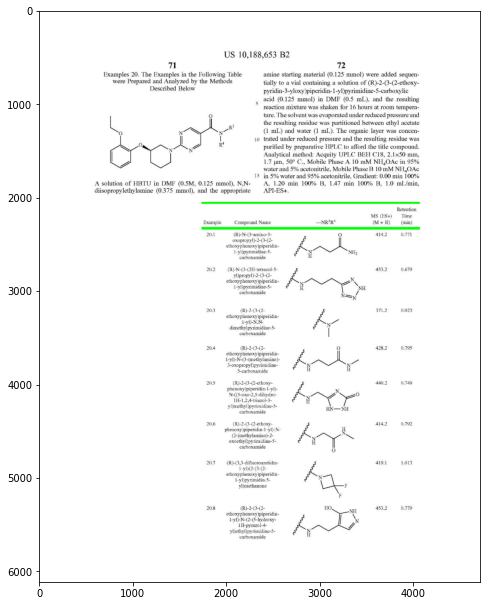

In [ ]:
##############################################################################
### Running line detection function
##############################################################################

## From https://github.com/DevashishPrasad/CascadeTabNet/blob/master/Table%20Structure%20Recognition/Functions/line_detection.py

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path


# input_img = cv2.resize(input_img, page_sized_box[2:], interpolation=cv2.INTER_AREA) # 엥 이상하게 resize를 안해야 결과가 더 완벽하게 나옴. 
# resize를 안하고 걍 결과를 scale할 수 없음?

# img_path = os.path.join(files_path, f'{input_file_name}.png')
pil_img = convert_from_path(path)

cv2_images = []
for page_idx in range(num_pages):
  cv2_image = cv2.cvtColor(np.array(pil_img[page_idx]), cv2.COLOR_RGB2BGR)
  cv2_images.append(cv2_image)

print(f'cv2_images = {cv2_images}')

scale_factor_width, scale_factor_height = get_scaling_factors(page_sized_box, cv2_images[0].shape)

line_detection_res = []
for page_idx in range(num_pages):
  input_img = cv2_images[page_idx]
  # input_img = cv2.imread(img[page_idx])
  # input_img = cv2.resize(input_img, page_sized_box[2:], interpolation=cv2.INTER_AREA) # 엥 이상하게 resize를 안해야 결과가 더 완벽하게 나옴. 

  hor_lines = get_horizontal_lines(input_img, scale_factor_width, scale_factor_height, save_img=False)
  # 여기까지가 한 페이지의 hor_lines 좌표들의 list인데. 각각 좌표에 가서 
  hor_lines.sort(key = lambda x: x[1])
  hor_lines.sort(key = lambda x: x[0])
  hor_lines = merge_hor_lines(hor_lines)

  line_detection_res.append( hor_lines )


In [ ]:
print(type(img[0]))


<class 'PIL.PpmImagePlugin.PpmImageFile'>


In [ ]:
sorted_list = sorted(line_detection_res[7], key = lambda x: x[1])
print(sorted_list)
print(len(sorted_list))

print(1700*0.4)

[[589, 1694, 1461, 1694], [589, 1820, 1461, 1820]]
2
680.0


In [ ]:
# len(input_img) # 6112
img_path

'/content/drive/My Drive/DMIS/IUPAC_ocr_corr/patent_pdf_examples/US_table_examples/tables_extracted.png'

In [ ]:
##############################################################################
### Constructs "table_bboxes" using line detection res from prev cells
##############################################################################

hor_lines = line_detection_res 
vertical_margin = 50
table_bboxes = [] 

print(f'num_pages = {num_pages}') # already has this var while constructing bboxes. 

for page_idx in range(num_pages):

  page_end_y2 = bboxes_merged_vert[page_idx][::-1][-1][3] # 이게 좀 짧게 나옴. pdfminer이 y축 처리하는 방식이랑 좀 관련된거같은데. 
  print(f'page_end_y2 = {page_end_y2}')

  table_bboxes.append([])

  for x1_hor_line, y1_hor_line, x2_hor_line, y2_hor_line in hor_lines[page_idx]: # but im not entirely sure if this is a correct syntax. does it unpack automatically?
    # print(f'hor_lines[page_idx] = {hor_lines[page_idx]}')
    # print(f'x1_hor_line, y1_hor_line, x2_hor_line, y2_hor_line = {x1_hor_line, y1_hor_line, x2_hor_line, y2_hor_line}')

    text_after_table = False
    for idx, coords in enumerate(bboxes_default[page_idx]):
      x1_bbox, y1_bbox, x2_bbox, y2_bbox, _ = coords 
      
      below_hor_line = bool(y1_bbox >= y1_hor_line + vertical_margin)
      x1_diff_small = bool(abs(x1_bbox - x1_hor_line) < 400)
      fat_enough = bool(abs(x2_bbox - x1_bbox) > 400) # 아니 이걸 400으로 줄인다고 굉장히 격한 반응이 일어나네. 이거가 되게 격한반응을 불러일으킴. 

      ## "hor line과 충분히 상하간격이 있다"도 추가할까?
      enough_apart = bool( abs(y1_hor_line - y1_bbox) > 200 )

      if below_hor_line and x1_diff_small and fat_enough: # 아. has to be pretty fat itself. 
        # then this is the end of table. 
        table_y2 = y1_bbox # ending y value of this table is y1_bbox. 

        table_bboxes[page_idx].append([x1_hor_line, y1_hor_line, x2_hor_line, table_y2])
        text_after_table = True
        print(f'table_bboxes[page_idx].append DONE. y1_hor_line = {y1_hor_line}. There was main text after hor line.')
        break 

    if text_after_table == False:
      table_y2 = page_end_y2 # ending y value of this table is y1_bbox. 

      table_bboxes[page_idx].append([x1_hor_line, y1_hor_line, x2_hor_line, table_y2])
      print(f'table_bboxes[page_idx].append DONE. y1_hor_line = {y1_hor_line}. Set page ending as table_y2')



num_pages = 1
page_end_y2 = 2033.0
table_bboxes[page_idx].append DONE. y1_hor_line = 739. Set page ending as table_y2
table_bboxes[page_idx].append DONE. y1_hor_line = 836. Set page ending as table_y2


In [ ]:
table_bboxes # 이게 이렇게 많을리가 없는데. hor_lines가 두개여야 하니까 얘도 2개여야 하는데. 

[[[589, 1694, 1461, 1957.0], [589, 1820, 1461, 1957.0]],
 [[215, 868, 1088, 922.0263667735505],
  [216, 276, 600, 922.0263667735505],
  [216, 364, 1089, 922.0263667735505],
  [217, 276, 1089, 922.0263667735505],
  [588, 1583, 1461, 1761.998],
  [588, 1714, 1460, 2056.0]],
 [[215, 277, 1087, 661.0], [215, 425, 1087, 661.0]],
 [[215, 277, 1087, 1323.0],
  [215, 459, 1087, 1323.0],
  [215, 2047, 1087, 2025.0]],
 [[628, 739, 1462, 2033.0], [628, 836, 1462, 2033.0]],
 [[215, 277, 1049, 1088.0],
  [215, 365, 1049, 1088.0],
  [215, 1034, 1049, 1088.0],
  [685, 2047, 1462, 2027.0],
  [686, 1597, 1462, 2027.0],
  [686, 1712, 1462, 2027.0],
  [1055, 2050, 1461, 2027.0]],
 [[863, 1338, 1462, 2083.0],
  [863, 1426, 1462, 2083.0],
  [1287, 1429, 1458, 2083.0]],
 [[215, 271, 813, 1031.0],
  [215, 359, 813, 1031.0],
  [215, 980, 813, 1031.0],
  [863, 270, 1462, 968.0],
  [863, 381, 1462, 968.0],
  [863, 914, 1462, 968.0]],
 [],
 [[239, 1346, 1462, 2022.0], [239, 1463, 1462, 2022.0]],
 [[214, 274, 143

In [ ]:
##################################################################################################################
### Constructs "filtered_table_bboxes". <- only takes largest among overlapping table bboxes in "table_bboxes"
##################################################################################################################
import copy

def lower_right(bbox):
  return (int(bbox[2]), int(bbox[3]))

def get_largest_table_bboxes(table_bboxes): # one page

  initial_length = len(table_bboxes)
  table_bboxes_copy = copy.deepcopy(table_bboxes)

  for k in range(initial_length):

    print('iterating while loop once more')
    print(f'len(table_bboxes_copy) = {len(table_bboxes_copy)}')
    lower_right_curr = lower_right(table_bboxes[k]) # last box in list. and give that to lower_right() func. 
    # 아 뭔가 이전에 지운게 없으면 걍 -1를 가져오면 안되네. 

    overlapping_bboxes = [bbox for bbox in table_bboxes_copy if lower_right(bbox) == lower_right_curr]
    overlapping_bboxes.sort(key = lambda x: x[1], reverse=True) # sort by y1 val
    print(f'overlapping_bboxes = {overlapping_bboxes}')

    num_overlaps = len(overlapping_bboxes)
    if num_overlaps >=2:
      for i in range(num_overlaps-1): # 아 이게 0인 경우 문제 생기나. 
        table_bboxes_copy.remove(overlapping_bboxes[i])
        print(f'removed! len(table_bboxes_copy) = {len(table_bboxes_copy)}')
		# at this point we have only one out of group and non-overlapping stuff.
    
  return table_bboxes_copy

filtered_table_bboxes = []
for i in range(num_pages):
  filtered_table_bboxes.append([]) # added at page dimension 
  table_bboxes_copy = copy.deepcopy(table_bboxes[i]) # table_bboxes[i].copy()
  filtered_table_bboxes[i] = get_largest_table_bboxes(table_bboxes_copy)

iterating while loop once more
len(table_bboxes_copy) = 2
overlapping_bboxes = [[628, 836, 1462, 2033.0], [628, 739, 1462, 2033.0]]
removed! len(table_bboxes_copy) = 1
iterating while loop once more
len(table_bboxes_copy) = 1
overlapping_bboxes = [[628, 739, 1462, 2033.0]]


In [ ]:
filtered_table_bboxes

[[[589, 1694, 1461, 1957.0]],
 [[215, 868, 1088, 922.0263667735505],
  [216, 276, 600, 922.0263667735505],
  [217, 276, 1089, 922.0263667735505],
  [588, 1583, 1461, 1761.998],
  [588, 1714, 1460, 2056.0]],
 [[215, 277, 1087, 661.0]],
 [[215, 277, 1087, 1323.0], [215, 2047, 1087, 2025.0]],
 [[628, 739, 1462, 2033.0]],
 [[215, 277, 1049, 1088.0],
  [686, 1597, 1462, 2027.0],
  [1055, 2050, 1461, 2027.0]],
 [[863, 1338, 1462, 2083.0], [1287, 1429, 1458, 2083.0]],
 [[215, 271, 813, 1031.0], [863, 270, 1462, 968.0]],
 [],
 [[239, 1346, 1462, 2022.0]],
 [[214, 274, 1436, 1987.0]],
 [[213, 269, 1435, 938.0],
  [214, 362, 335, 938.0],
  [214, 885, 1437, 938.0],
  [871, 885, 1437, 1086.0]],
 [[209, 281, 1432, 2200.0]],
 [[214, 277, 1436, 510.0], [215, 280, 616, 510.0]],
 [[215, 277, 1437, 1042.0]],
 [[414, 1264, 1462, 2021.0], [1279, 1267, 1460, 2021.0]],
 [[215, 277, 1262, 1987.0]],
 [[212, 271, 1259, 1964.0],
  [217, 2046, 1264, 1964.0],
  [335, 269, 1260, 1964.0]]]

In [ ]:
##############################################################################
### Util funtion to convert coordinates for camelot
##############################################################################

## Don't delete this comment section
# tables = camelot.read_pdf('table_areas.pdf', flavor='stream', table_areas=['316,499,566,337'])
# x1,y1,x2,y2 where (x1, y1) -> top-left and (x2, y2) -> bottom-right in PDF coordinate space. 
# In PDF coordinate space, the bottom-left corner of the page is the origin, with coordinates (0, 0).
## ah for fuck's sake that means 

def convert_coords_to_bottom_left_origin(coords, page_height): # yes i do still need this function due to camelot's quirks
  print(f'coords = {coords}')
  x1, y1_temp, x2, y2_temp = coords

  # we need to reverse the following:
  # y1_curr = page_sized_box[3] - y2_temp
  # y2_curr = page_sized_box[3] - y1_temp

  y1 = page_height - y1_temp # 왜 여기서는 y1, y2가 swap 안되는지 모르겠지만 이렇게 했을때 제대로 테이블을 잡음. 
  y2 = page_height - y2_temp

  return [x1, y1, x2, y2]

def remove_whitespace(in_string):
  return re.sub(r'(\s)+', '', in_string)


In [ ]:
##############################################################################
### Feed "filtered_table_bboxes" to camelot and parse stream tables.
##############################################################################
import camelot

save_tables = True

print(f'num_pages = {num_pages}')

# 이거 모든 페이지 iter하는 걸로 바꾸기.
for page_idx in range(num_pages):

  table_idx = 0
  for table_bbox_coords in filtered_table_bboxes[page_idx]:
    table_idx +=1
    table_region = convert_coords_to_bottom_left_origin(table_bbox_coords, page_height)
    table_region = [ int(x) for x in table_region ]
    table_region = str(table_region)[1:-1]
    table_region = remove_whitespace(table_region)
    print(f'table_region = {table_region}')

    tables = camelot.read_pdf(path, pages='all', flavor='stream', table_areas=[table_region]) 

    print(tables)
    for i in range(len(tables)):
      df = tables[i].df 
      print(list(df.columns))
      display(df)

    if save_tables == True:
      csv_path = results_path + f'{input_file_name}_page{page_idx+1}_table{table_idx+1}.csv'
      print(csv_path)
      df.to_csv(csv_path)

num_pages = 1
coords = [628, 739, 1462, 2033.0]
table_region = 628,1461,1462,167
<TableList n=1>
[0, 1, 2, 3, 4, 5]


,0,1,2,3,4,5
0,,,,,,Retention
1,,,,,MS (BS+),Time
2,Example,Compound Name,—NR?R!,,(M+),(min)
3,2\n0.1,(R)-N-(3-amino-3-,,9,414.2,O.771
4,,oxopropyl)-2-(3-(2-,,,,
5,,ethoxyphenoxy)piperidin-,,,,
6,,,"AK,",,,
7,,1-yl)pyrimidine-5-,,,,
8,,carboxamide,,,,
9,20.2,(R)-N-(3-(2EL-tetrazol-5-,,,453.2,0.679


/content/drive/My Drive/DMIS/IUPAC_ocr_corr/results/stream_table_test_1_page1_table2.csv


In [ ]:
table_region

'589,243,1461,506'

y1 = 40.440000000000055
y2 = 49.440200000000004
y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 72.55999999999995
y2 = 139.44000000000005
y1 = 167.36
y2 = 316.79999999999995
y1 = 225.1851428076801
y2 = 308.64
y1 = 266.48
y2 = 289.44000000000005
y1 = 266.48
y2 = 276.48
y1 = 290.88
y2 = 308.64
y1 = 298.64
y2 = 316.79999999999995
y1 = 310.79999999999995
y2 = 332.64
y1 = 323.64
y2 = 332.64
y1 = 335.32
y2 = 340.32
y1 = 397.4
y2 = 404.4
y1 = 397.4
y2 = 414.0
y1 = 410.0
y2 = 414.0
y1 = 416.52
y2 = 425.52
y1 = 418.64
y2 = 428.64
y1 = 418.64
y2 = 451.2
y1 = 448.12
y2 = 453.12
y1 = 463.48
y2 = 468.48
y1 = 469.16
y2 = 476.16
y1 = 471.96
y2 = 480.96
y1 = 487.52
y2 = 762.9598
y1 = 564.36
y2 = 573.36
y1 = 659.16
y2 = 668.16
y1 = 753.9602
y2 = 762.9602
y1 = 781.0398
y2 = 791.0398


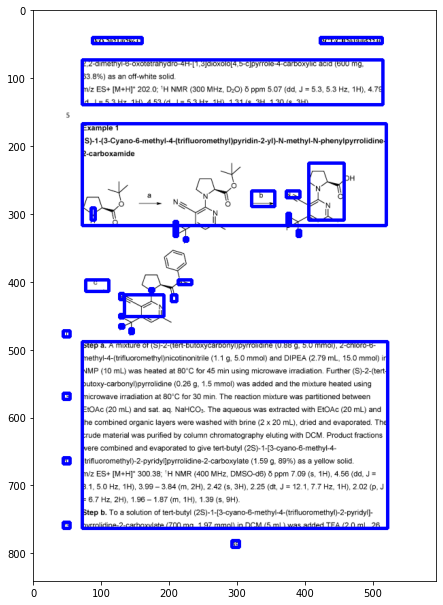

y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 72.55999999999995
y2 = 443.04
y1 = 244.44000000000005
y2 = 253.44000000000005
y1 = 339.24
y2 = 348.24
y1 = 434.04
y2 = 443.04
y1 = 470.96
y2 = 518.88
y1 = 599.52
y2 = 621.36
y1 = 599.52
y2 = 617.52
y1 = 599.52
y2 = 617.52
y1 = 613.8
y2 = 622.8
y1 = 665.48
y2 = 696.48
y1 = 665.48
y2 = 734.88
y1 = 725.88
y2 = 746.1602
y1 = 748.60004
y2 = 753.60004
y1 = 781.0398
y2 = 791.0398


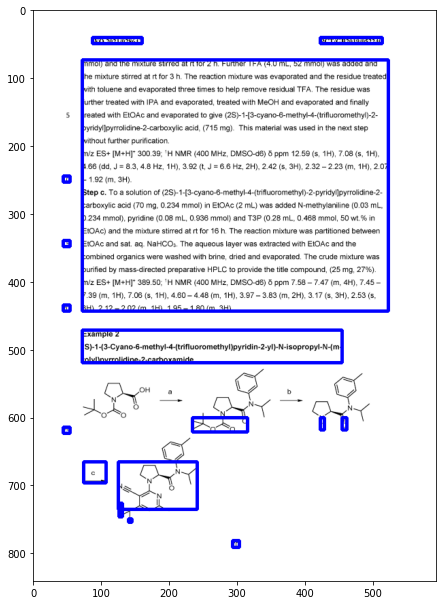

y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 72.55999999999995
y2 = 689.76
y1 = 244.44000000000005
y2 = 253.44000000000005
y1 = 339.24
y2 = 348.24
y1 = 434.04
y2 = 443.04
y1 = 528.8399999999999
y2 = 537.8399999999999
y1 = 623.88
y2 = 632.88
y1 = 717.6800000000001
y2 = 765.6
y1 = 718.6800000000001
y2 = 727.6800000000001
y1 = 781.0398
y2 = 791.0398


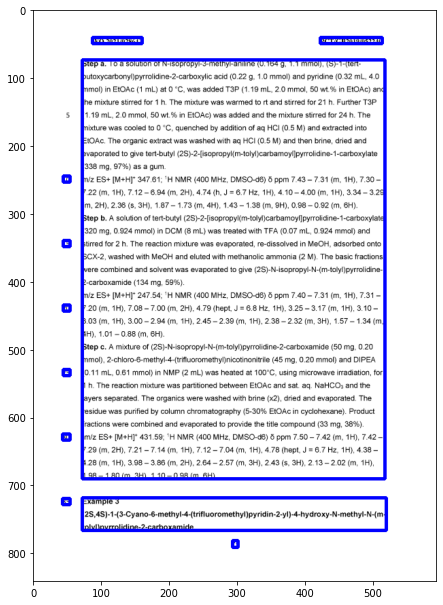

y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 97.32000000000005
y2 = 106.32000000000005
y1 = 103.08016000000009
y2 = 172.79999999999995
y1 = 143.79999999999995
y2 = 196.79999999999995
y1 = 143.79999999999995
y2 = 172.79999999999995
y1 = 145.39999999999998
y2 = 158.39999999999998
y1 = 166.20000000000005
y2 = 175.20000000000005
y1 = 166.20000000000005
y2 = 175.20000000000005
y1 = 207.91999999999996
y2 = 672.96
y1 = 360.36
y2 = 369.36
y1 = 455.4
y2 = 464.4
y1 = 550.2
y2 = 559.2
y1 = 645.0
y2 = 654.0
y1 = 700.88
y2 = 749.0398
y1 = 740.0398
y2 = 749.0398
y1 = 781.0398
y2 = 791.0398


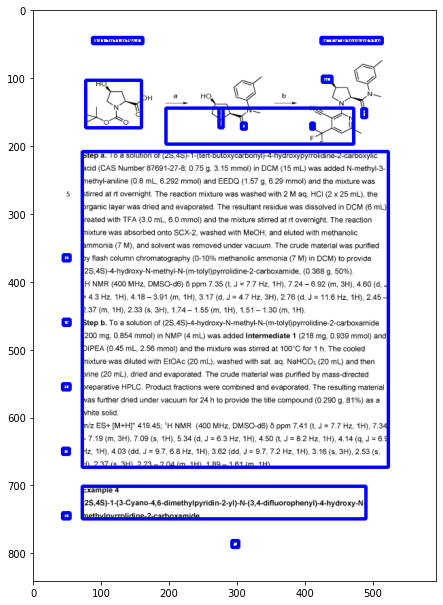

y1 = 40.440000000000055
y2 = 49.440099999999916
y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 73.44000000000005
y2 = 119.75999999999999
y1 = 73.44000000000005
y2 = 119.75999999999999
y1 = 73.44000000000005
y2 = 91.44000000000005
y1 = 94.32000000000005
y2 = 119.75999999999999
y1 = 111.75999999999999
y2 = 128.39999999999998
y1 = 111.75999999999999
y2 = 128.39999999999998
y1 = 131.08000000000004
y2 = 142.08000000000004
y1 = 131.08000000000004
y2 = 142.08000000000004
y1 = 131.08000000000004
y2 = 142.08000000000004
y1 = 146.51999999999998
y2 = 155.51999999999998
y1 = 146.51999999999998
y2 = 155.51999999999998
y1 = 168.79999999999995
y2 = 178.79999999999995
y1 = 168.79999999999995
y2 = 178.79999999999995
y1 = 168.79999999999995
y2 = 178.79999999999995
y1 = 189.15999999999997
y2 = 194.15999999999997
y1 = 217.48029999999994
y2 = 222.48029999999994
y1 = 226.96000000000004
y2 = 240.96000000000004
y1 = 226.96000000000004
y2 = 240.96000000000004
y1 = 248.44000000000005
y2 = 269.28
y1 = 254.

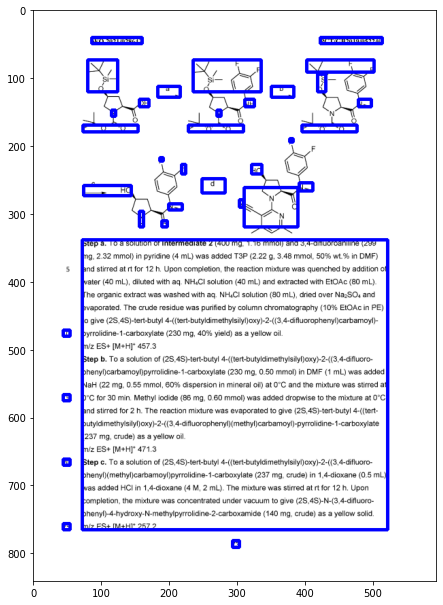

y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 72.55999999999995
y2 = 272.64
y1 = 244.67999999999995
y2 = 253.67999999999995
y1 = 300.55999999999995
y2 = 573.6
y1 = 339.48
y2 = 348.48
y1 = 369.36
y2 = 375.36
y1 = 376.6
y2 = 381.6
y1 = 378.8
y2 = 388.8
y1 = 378.8
y2 = 388.8
y1 = 499.0
y2 = 504.0
y1 = 502.72
y2 = 516.72
y1 = 537.24
y2 = 621.6
y1 = 566.6
y2 = 573.6
y1 = 578.76
y2 = 587.76
y1 = 586.566
y2 = 598.566
y1 = 587.76
y2 = 642.0
y1 = 600.88
y2 = 621.6
y1 = 600.88
y2 = 608.88
y1 = 610.6
y2 = 642.0
y1 = 657.6800000000001
y2 = 743.7601999999999
y1 = 696.84
y2 = 705.84
y1 = 781.0398
y2 = 791.0398


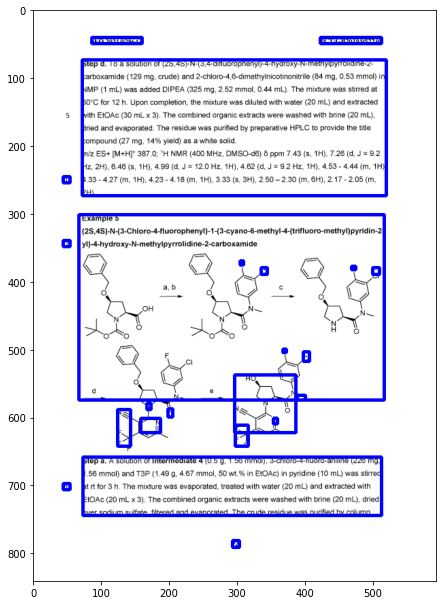

y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 72.55999999999995
y2 = 765.6
y1 = 244.44000000000005
y2 = 253.44000000000005
y1 = 339.24
y2 = 348.24
y1 = 434.04
y2 = 443.04
y1 = 528.8399999999999
y2 = 537.8399999999999
y1 = 623.88
y2 = 632.88
y1 = 718.6800000000001
y2 = 727.6800000000001
y1 = 781.0398
y2 = 791.0398


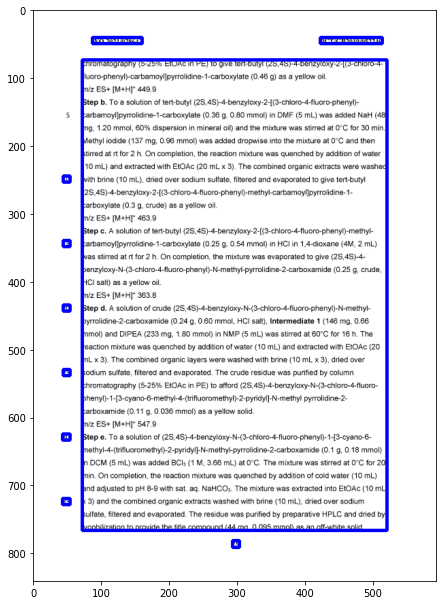

y1 = 40.43999999999994
y2 = 49.440000000000055
y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 68.55999999999995
y2 = 120.48000000000002
y1 = 148.39999999999998
y2 = 196.32000000000005
y1 = 209.55999999999995
y2 = 214.55999999999995
y1 = 216.51977
y2 = 221.51977
y1 = 245.64
y2 = 254.64
y1 = 252.84000000000003
y2 = 261.84000000000003
y1 = 264.4
y2 = 282.96000000000004
y1 = 264.4
y2 = 272.4
y1 = 264.4
y2 = 272.4
y1 = 275.96000000000004
y2 = 282.96000000000004
y1 = 275.96000000000004
y2 = 282.96000000000004
y1 = 275.96000000000004
y2 = 282.96000000000004
y1 = 287.4
y2 = 296.4
y1 = 287.4
y2 = 296.4
y1 = 298.0
y2 = 306.0
y1 = 298.0
y2 = 306.0
y1 = 298.0
y2 = 306.0
y1 = 298.0
y2 = 327.6
y1 = 316.6
y2 = 332.64
y1 = 316.6
y2 = 327.6
y1 = 324.64
y2 = 332.64
y1 = 339.0
y2 = 348.0
y1 = 339.0
y2 = 348.0
y1 = 363.2
y2 = 733.6800000000001
y1 = 383.4
y2 = 392.4
y1 = 478.2
y2 = 487.2
y1 = 573.24
y2 = 582.24
y1 = 668.04
y2 = 677.04
y1 = 781.0398
y2 = 791.0398


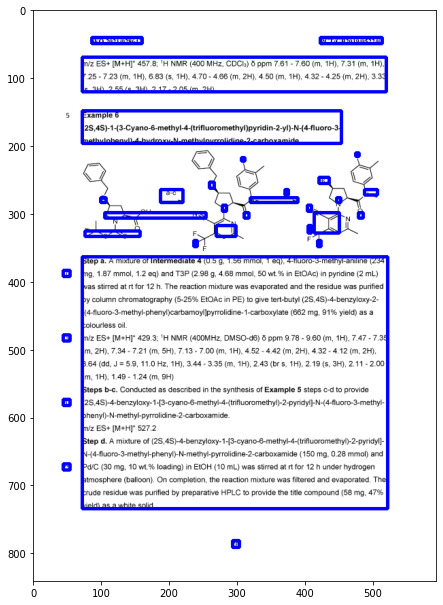

y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 40.440000000000055
y2 = 49.440000000000055
y1 = 68.55999999999995
y2 = 139.44000000000005
y1 = 167.36
y2 = 196.32000000000005
y1 = 224.24
y2 = 253.67999999999995
y1 = 266.03999999999996
y2 = 275.03999999999996
y1 = 280.44000000000005
y2 = 322.08000000000004
y1 = 287.12
y2 = 297.12
y1 = 291.0
y2 = 300.0
y1 = 325.03999999999996
y2 = 335.04
y1 = 327.48
y2 = 336.48
y1 = 781.0398
y2 = 791.0398


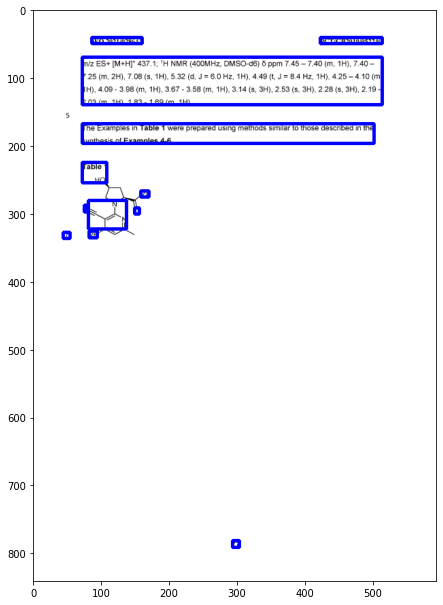

y1 = 41.440000000000055
y2 = 780.7601999999999
y1 = 41.440000000000055
y2 = 50.440000000000055
y1 = 90.51999999999998
y2 = 121.96000000000004
y1 = 90.51999999999998
y2 = 121.96000000000004
y1 = 90.5200000000001
y2 = 122.20000000000005
y1 = 96.5200000000001
y2 = 122.20000000000005
y1 = 132.75992000000008
y2 = 173.55999999999995
y1 = 132.75992000000008
y2 = 173.55999999999995
y1 = 132.76016000000004
y2 = 173.55999999999995
y1 = 132.99991999999997
y2 = 209.08000000000004
y1 = 133.0
y2 = 175.24
y1 = 133.4798199999999
y2 = 193.24
y1 = 133.47982000000002
y2 = 191.79999999999995
y1 = 133.47982000000002
y2 = 167.55999999999995
y1 = 133.4800600000001
y2 = 204.76
y1 = 133.48023999999998
y2 = 390.76
y1 = 133.71992000000012
y2 = 391.0
y1 = 133.72008000000005
y2 = 151.0
y1 = 133.72008000000005
y2 = 151.0
y1 = 133.72008000000005
y2 = 151.0
y1 = 156.27969705364
y2 = 262.12
y1 = 156.51981999999998
y2 = 246.51999999999998
y1 = 157.4798199999999
y2 = 227.55999999999995
y1 = 173.07984
y2 = 190.6000000000

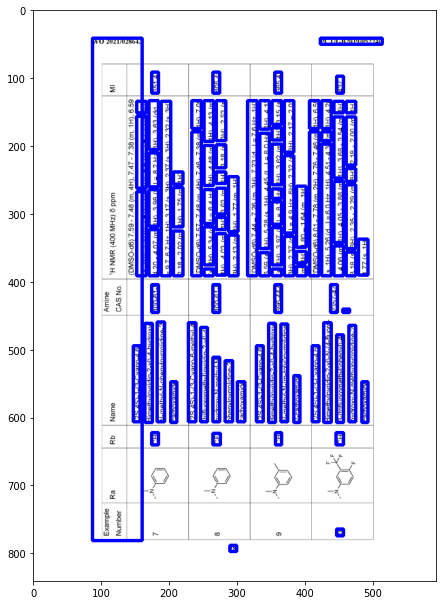

In [ ]:
##############################################################################
### Draw Bounding Box Arrays over PDF file. 
##############################################################################

## make clean drawing function
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
import random 

# def draw_bboxes(pdf_path, )# list of bbox coords? page? "coords_to_use" has page dimension. 

save_img = True


# image_path = path
# image = convert_from_path(image_path)


try:
  image = pil_img
except NameError:
  image_path = path
  image = convert_from_path(image_path)


scale_factor = 1

## Do NOT delete this comment section.
# bboxes_default, num_pages, page_height, page_sized_box = 
# bboxes_clean, _, _, _ = 
# bboxes_merged_vert, _, _, _ = 
# bboxes_merged_hor, _, _, _ = 

coords_to_use = bboxes_clean
# coords_to_use = line_detection_res # 아 이게 안되네. 흠. 이게 스케일이 안맞네. 위에서 resize하고 오니까 스케일은 맞는거같은데 상하가 바뀐거같음. 아 해결함. pdfminer이 y값을 거꾸로 주나봄. 
# coords_to_use = filtered_table_bboxes
# coords_to_use = table_bboxes

if coords_to_use in (bboxes_default, bboxes_clean, bboxes_merged_vert, bboxes_merged_hor):
  used_pdfminer = True
else:
  used_pdfminer = False

 
for page_idx in range(len(image)):

    page_img = image[page_idx] # same as number of pages in the original pdf file. -> nah i dont think so. 한 페이지 내의 textbox 갯수인 듯. -> 아 갯수가 아니라 걍 그 한 페이지 이미지파일 자체. 
    image_numpy = np.array(page_img) # 한 페이지의 이미지를 np array로 저장. 
    image_numpy = cv2.resize(image_numpy, page_sized_box[2:], interpolation=cv2.INTER_AREA)

    num_bboxes = len(coords_to_use[page_idx])

    for bbox_idx in range(num_bboxes):

      x1, y1, x2, y2 = coords_to_use[page_idx][bbox_idx][0], coords_to_use[page_idx][bbox_idx][1], coords_to_use[page_idx][bbox_idx][2], coords_to_use[page_idx][bbox_idx][3]

      upper_left = (round(x1), round(y1)) # round 안하면 type 틀리다고 나옴. float은 안되나벼
      lower_right = (round(x2), round(y2))

      print(f'y1 = {y1}')
      print(f'y2 = {y2}')

      # color = tuple(np.random.random(size=3) * 256)
      # thickness = np.random.random(size=1) * 10
      thickness = 3
      color = (0, 0, 255)
      cv2.rectangle(image_numpy, upper_left, lower_right, color, int(thickness))# lineType = LINE_AA)
    
    plt.figure(), plt.imshow(image_numpy)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    if save_img:
      plt.savefig(results_path + f'{input_file_name}_page{page_idx}_bboxes_clean.png')
    # else:
    #   plt.savefig(results_path + f'{input_file_name}_page{page_idx}_bbox_noparam.png')

    plt.show()


In [ ]:
str(coords_to_use)

'[[[215, 271, 813, 1031.0], [863, 270, 1462, 968.0]]]'